In [27]:
savefiledirectory = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0'
specdict = pickle.load(
    open(savefiledirectory+'/cloud-free-spectrum-full-output-R150.pkl','rb'))




In [14]:

import picaso.justplotit as jpi
mrp = jpi.mixing_ratio(specdict['full output'], plot_height=900, plot_width=600)
# Save mixing ratio plot for future inspection
from bokeh.plotting import output_file, save, show
jpi.output_notebook()

show(mrp)

Loading BokehJS ...

In [25]:
specdict['full output']['layer']['mixingratios'].keys()

Index(['H2', 'H', 'H+', 'H-', 'H2-', 'H2+', 'H3+', 'He', 'H2O', 'CH4', 'CO',
       'NH3', 'N2', 'PH3', 'H2S', 'TiO', 'VO', 'Fe', 'FeH', 'CrH', 'Na', 'K',
       'Rb', 'Cs', 'CO2', 'HCN', 'C2H2', 'C2H4', 'C2H6', 'SiO', 'MgH', 'OCS',
       'Li', 'LiOH', 'LiH', 'LiCl', 'LiF'],
      dtype='object')

In [50]:
noclouds['ptchem_df']
sort = np.argsort(noclouds['ptchem_df'].loc[0])[::-1]

highest_abundance = np.array(noclouds['ptchem_df'].keys()[sort])
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='temperature'))
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='pressure'))
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='e-'))
highest_abundance

array(['H2', 'He', 'H2O', 'CH4', 'N2', 'H2S', 'NH3', 'CO2', 'CO', 'OCS',
       'HCN', 'H', 'H2+', 'H3+', 'H2-', 'H-', 'H+', 'PH3', 'LiF', 'TiO',
       'LiCl', 'LiH', 'LiOH', 'Li', 'MgH', 'SiO', 'C2H6', 'C2H4', 'C2H2',
       'Cs', 'Rb', 'K', 'Na', 'CrH', 'FeH', 'Fe', 'VO'], dtype=object)

<IPython.core.display.Javascript object>


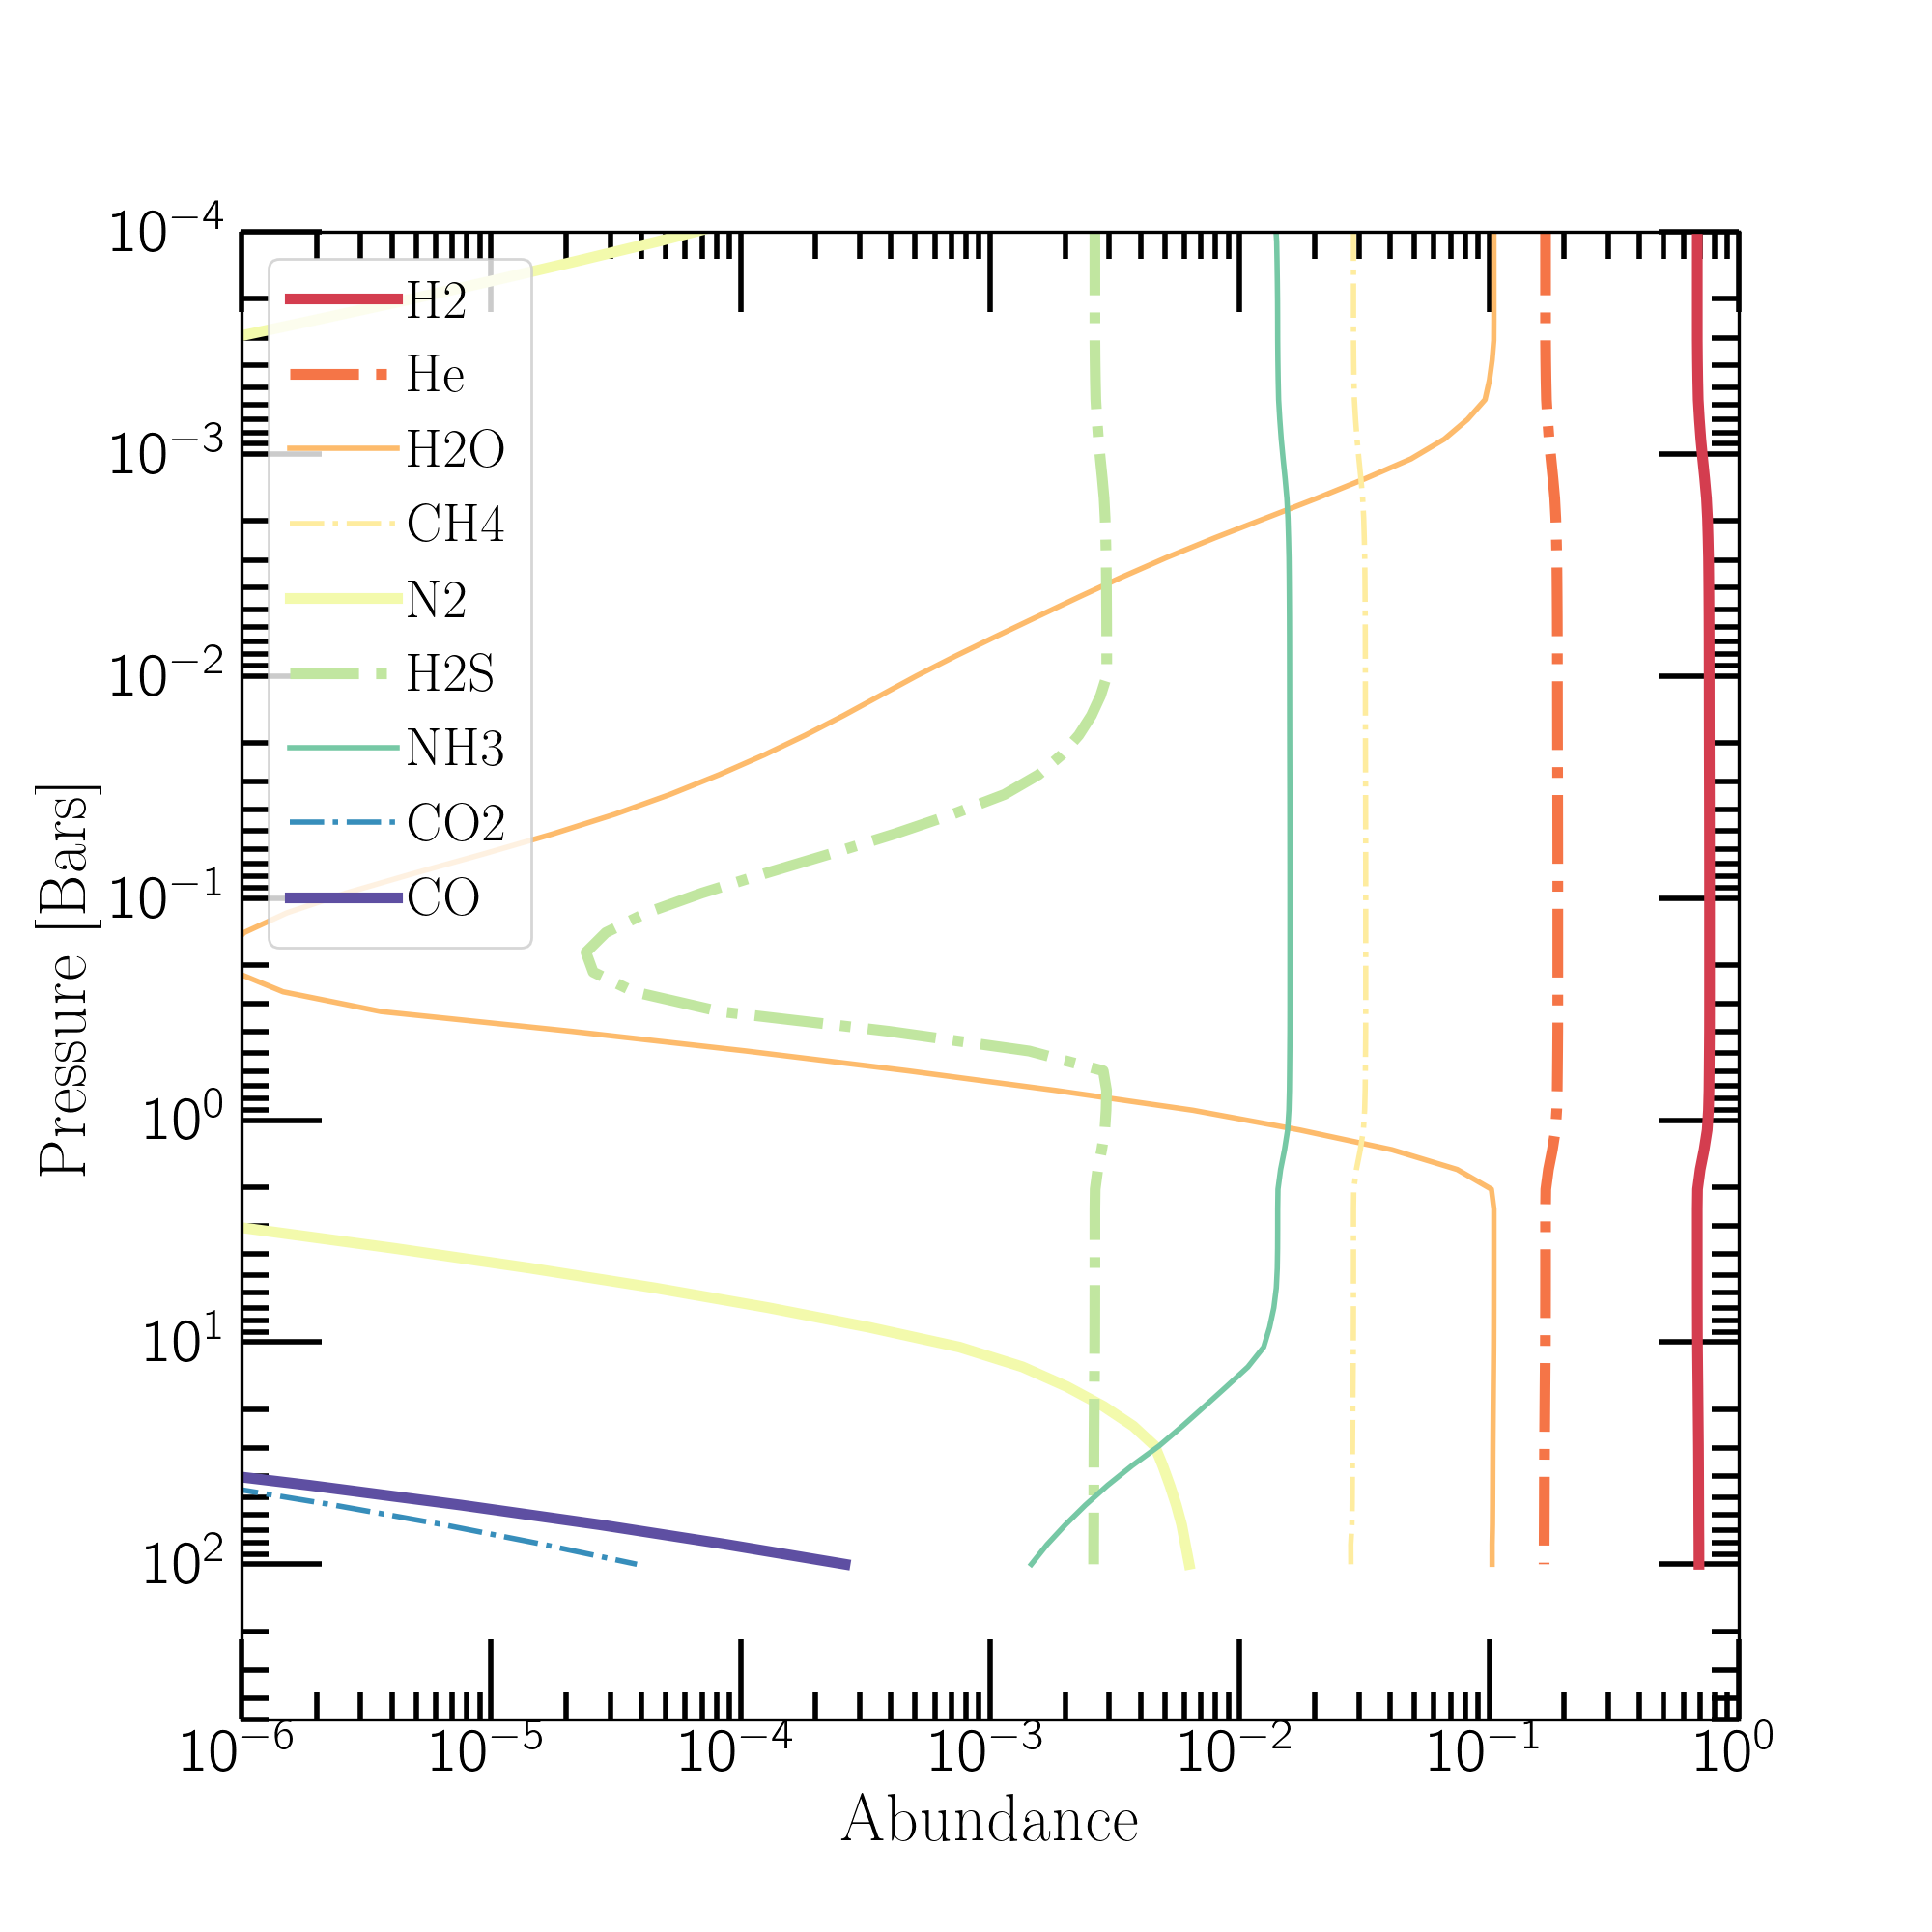

In [70]:
pl, noclouds = pickle.load(open(savefiledirectory+'/cloud-free-model.pkl','rb'))

#mols = ['H2O','CH4','CO','NH3']
mols = highest_abundance[:9]

#### Use 'ptchem_df' output from climate model, which contains the chemical structure of the
# computed climate.

%matplotlib notebook

import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')
linestyles = ['-','-.']*len(mols)
lineweights = [4,4,2,2]*len(mols)

n = len(mols)
cs = np.linspace(0.1,1,n)
colors = cmap(cs)

#colors = 

plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Abundance', fontsize=25)
plt.ylim(500,1e-4)
plt.xlim(left=1e-6)

for i,mol in enumerate(mols):
    plt.plot(noclouds['ptchem_df'][mol],
             noclouds['ptchem_df']['pressure'],
             color=colors[i],linewidth=lineweights[i],label=mol,ls=linestyles[i])
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
#plt.gca().invert_yaxis()
plt.legend(fontsize=20)

In [71]:
savefiledirectory = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0'
specdict = pickle.load(
    open(savefiledirectory+'/cloud-free-spectrum-full-output-R150.pkl','rb'))

pdict, sdict, cdict = pickle.load(open(savefiledirectory+'/cloud-free-model-inputs.pkl','rb'))

pdict.keys()

dict_keys(['tint', 'Teq', 'radius', 'radius_unit', 'mass', 'mass_unit', 'gravity', 'gravity_unit', 'semi_major', 'semi_major_unit', 'mh', 'CtoO', 'phase', 'num_tangle', 'num_gangle', 'noTiOVO', 'planet_mh_str', 'local_ck_path'])

In [73]:
int(pdict['planet_mh_str'])

200

In [74]:
def ConvertPlanetMHtoCKStr(m):
    prefixsign = np.sign(m)
    if prefixsign == -1:
        prefix = '-'
    else:
        prefix = '+'
    m = int(np.abs(m))
    if m / 100 >= 1.0:
        m = prefix+str(m)
    elif m == 0:
        m = '+000'
    else:
        m = prefix+'0'+str(m)
    return m

ConvertPlanetMHtoCKStr(pdict['planet_mh_str'])

'+200'

In [1]:
file = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase120'
from myastrotools.reflectx import GetDirectoryLocInP, GetP
p = GetP()
GetDirectoryLocInP(p, file)

36

In [2]:
pickle.load(open(file+"/virga-recommended-molecules.pkl",'rb'))

['Al2O3',
 'CaAl12O19',
 'CaTiO3',
 'Cr',
 'Fe',
 'H2O',
 'KCl',
 'Mg2SiO4',
 'MgSiO3',
 'MnS',
 'NH3',
 'Na2S',
 'SiO2',
 'TiO2',
 'ZnS']

In [1]:
import picaso.justdoit as jdi
opa = jdi.opannection()

In [4]:
type(opa.wno[0])

numpy.float64

In [5]:
np.interp

<function numpy.interp(x, xp, fp, left=None, right=None, period=None)>

In [10]:
case1 = jdi.inputs()
#phase
case1.phase_angle(0) #radians

#gravity
case1.gravity(gravity = 25, gravity_unit=jdi.u.Unit('m/(s**2)'))

#star
case1.star(opa, 6000,0.0122,4.437) #kelvin, log metal, log cgs

#atmosphere
case1.atmosphere(filename= jdi.jupiter_pt(), delim_whitespace=True)
case1.clouds( filename= jdi.jupiter_cld(), delim_whitespace=True)

case1.inputs['clouds']['profile']

,lvl,wv,opd,g0,w0,sigma
0,1,1,0.0,0.0,0.0,0.0
1,1,2,0.0,0.0,0.0,0.0
2,1,3,0.0,0.0,0.0,0.0
3,1,4,0.0,0.0,0.0,0.0
4,1,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11755,60,192,0.0,0.0,0.0,0.0
11756,60,193,0.0,0.0,0.0,0.0
11757,60,194,0.0,0.0,0.0,0.0
11758,60,195,0.0,0.0,0.0,0.0


In [13]:
from picaso.wavelength import regrid
self = case1
self.input_wno = self.input['clouds']['wavenumber']
cld_input = case1.inputs['clouds']['profile']
opd = np.reshape(cld_input['opd'].values, (case1.c.nlayer,case1.c.input_npts_wave))
# opd = regrid_cld(opd, self.input_wno, wno)

AttributeError: 'inputs' object has no attribute 'c'